In [284]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold,RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd 
import os
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
from category_encoders import *
from collections import Counter
from scipy.stats import pearsonr,shapiro,kstest
from sklearn.model_selection import cross_val_score
from itertools import chain,product

In [349]:
data = pd.read_csv('train_fNxu4vz.csv')
data = data.drop('Loan_ID',axis = 1)

In [355]:
data.Number_Open_Accounts  = np.log(data.Number_Open_Accounts + 1)
data.Total_Accounts = np.log(data.Total_Accounts + 1)

In [356]:
key = np.where(data.columns)[0].tolist()
values = list(data.columns.values)
dic = dict(zip(key,values))
dic

{0: 'Loan_Amount_Requested',
 1: 'Length_Employed',
 2: 'Home_Owner',
 3: 'Annual_Income',
 4: 'Income_Verified',
 5: 'Purpose_Of_Loan',
 6: 'Debt_To_Income',
 7: 'Inquiries_Last_6Mo',
 8: 'Months_Since_Deliquency',
 9: 'Number_Open_Accounts',
 10: 'Total_Accounts',
 11: 'Gender',
 12: 'Interest_Rate'}

In [357]:
for i in [3]:
    iqr = data[dic[i]].quantile(0.75) - data[dic[i]].quantile(0.25)
    upper_fence = data[dic[i]].quantile(0.75) + 1.5*iqr
    data.loc[data[dic[i]] > upper_fence,dic[i]] = np.round(upper_fence)

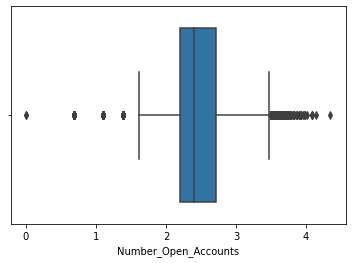

In [358]:
a1 = sns.boxplot(data.Number_Open_Accounts)

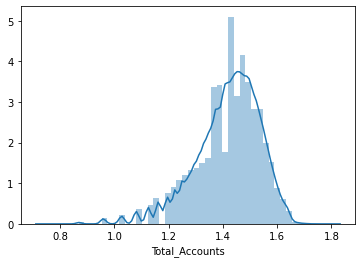

In [359]:
#sns.distplot(np.log(data.Total_Accounts))
sns.distplot(np.log(data.Total_Accounts + 1))

In [360]:
print(data.isnull().sum())

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64


In [361]:
levels = {'not verified':'not verified','VERIFIED - income':'verified','VERIFIED - income source':'verified'}
data.Income_Verified = data.Income_Verified.map(levels)
data.Home_Owner = data.Home_Owner.replace('None',np.nan)

In [362]:
cat_var = np.where(data.dtypes == np.object)[0]
for i in cat_var:
    data[dic[i]] = data[dic[i]].fillna(data[dic[i]].mode()[0])

new_data = data
for i in cat_var:
    dum = pd.get_dummies(data[dic[i]],drop_first=True,prefix=dic[i])
    new_data[dum.columns] = dum
    new_data = new_data.drop(dic[i],axis = 1)

In [363]:
new_data =data

In [364]:
x_train,x_test,y_train,y_test = train_test_split(new_data.drop('Interest_Rate', axis = 1).values,new_data['Interest_Rate'].values,test_size = 0.25,random_state = 100)

In [365]:
cat = CatBoostClassifier(iterations=1000)
model = cat.fit(x_train,y_train,cat_features = cat_var)

Learning rate set to 0.101146
0:	learn: 1.0791962	total: 374ms	remaining: 6m 13s
1:	learn: 1.0632050	total: 807ms	remaining: 6m 42s
2:	learn: 1.0500030	total: 1.04s	remaining: 5m 46s
3:	learn: 1.0382606	total: 1.33s	remaining: 5m 31s
4:	learn: 1.0289849	total: 1.56s	remaining: 5m 11s
5:	learn: 1.0203028	total: 1.82s	remaining: 5m 1s
6:	learn: 1.0125316	total: 2.2s	remaining: 5m 12s
7:	learn: 1.0065237	total: 2.48s	remaining: 5m 7s
8:	learn: 1.0003311	total: 2.7s	remaining: 4m 57s
9:	learn: 0.9950246	total: 2.91s	remaining: 4m 48s
10:	learn: 0.9902749	total: 3.17s	remaining: 4m 45s
11:	learn: 0.9864117	total: 3.43s	remaining: 4m 42s
12:	learn: 0.9826302	total: 3.68s	remaining: 4m 39s
13:	learn: 0.9794358	total: 3.93s	remaining: 4m 36s
14:	learn: 0.9762832	total: 4.19s	remaining: 4m 35s
15:	learn: 0.9733858	total: 4.49s	remaining: 4m 36s
16:	learn: 0.9709527	total: 4.71s	remaining: 4m 32s
17:	learn: 0.9683368	total: 5.01s	remaining: 4m 33s
18:	learn: 0.9661543	total: 5.27s	remaining: 4m 

158:	learn: 0.9184941	total: 42s	remaining: 3m 42s
159:	learn: 0.9183897	total: 42.3s	remaining: 3m 42s
160:	learn: 0.9182674	total: 42.5s	remaining: 3m 41s
161:	learn: 0.9181476	total: 42.8s	remaining: 3m 41s
162:	learn: 0.9180021	total: 43.1s	remaining: 3m 41s
163:	learn: 0.9178915	total: 43.3s	remaining: 3m 40s
164:	learn: 0.9177905	total: 43.6s	remaining: 3m 40s
165:	learn: 0.9176666	total: 43.8s	remaining: 3m 40s
166:	learn: 0.9175701	total: 44.1s	remaining: 3m 39s
167:	learn: 0.9174925	total: 44.3s	remaining: 3m 39s
168:	learn: 0.9173468	total: 44.6s	remaining: 3m 39s
169:	learn: 0.9172731	total: 44.8s	remaining: 3m 38s
170:	learn: 0.9172183	total: 45.1s	remaining: 3m 38s
171:	learn: 0.9170971	total: 45.4s	remaining: 3m 38s
172:	learn: 0.9170848	total: 45.5s	remaining: 3m 37s
173:	learn: 0.9170158	total: 45.8s	remaining: 3m 37s
174:	learn: 0.9169344	total: 46s	remaining: 3m 36s
175:	learn: 0.9168381	total: 46.2s	remaining: 3m 36s
176:	learn: 0.9167267	total: 46.5s	remaining: 3m 3

314:	learn: 0.9070119	total: 1m 20s	remaining: 2m 55s
315:	learn: 0.9069617	total: 1m 20s	remaining: 2m 54s
316:	learn: 0.9069363	total: 1m 20s	remaining: 2m 54s
317:	learn: 0.9068858	total: 1m 21s	remaining: 2m 54s
318:	learn: 0.9068177	total: 1m 21s	remaining: 2m 53s
319:	learn: 0.9067566	total: 1m 21s	remaining: 2m 53s
320:	learn: 0.9067201	total: 1m 22s	remaining: 2m 53s
321:	learn: 0.9066569	total: 1m 22s	remaining: 2m 53s
322:	learn: 0.9065862	total: 1m 22s	remaining: 2m 53s
323:	learn: 0.9065494	total: 1m 22s	remaining: 2m 52s
324:	learn: 0.9064338	total: 1m 23s	remaining: 2m 52s
325:	learn: 0.9063380	total: 1m 23s	remaining: 2m 52s
326:	learn: 0.9062920	total: 1m 23s	remaining: 2m 52s
327:	learn: 0.9062581	total: 1m 23s	remaining: 2m 51s
328:	learn: 0.9061770	total: 1m 24s	remaining: 2m 51s
329:	learn: 0.9060998	total: 1m 24s	remaining: 2m 51s
330:	learn: 0.9060857	total: 1m 24s	remaining: 2m 50s
331:	learn: 0.9060164	total: 1m 24s	remaining: 2m 50s
332:	learn: 0.9059488	total:

466:	learn: 0.8992030	total: 1m 56s	remaining: 2m 13s
467:	learn: 0.8991392	total: 1m 57s	remaining: 2m 13s
468:	learn: 0.8991115	total: 1m 57s	remaining: 2m 12s
469:	learn: 0.8990418	total: 1m 57s	remaining: 2m 12s
470:	learn: 0.8990168	total: 1m 57s	remaining: 2m 12s
471:	learn: 0.8989612	total: 1m 58s	remaining: 2m 12s
472:	learn: 0.8989032	total: 1m 58s	remaining: 2m 11s
473:	learn: 0.8988364	total: 1m 58s	remaining: 2m 11s
474:	learn: 0.8987655	total: 1m 58s	remaining: 2m 11s
475:	learn: 0.8987165	total: 1m 59s	remaining: 2m 11s
476:	learn: 0.8986500	total: 1m 59s	remaining: 2m 10s
477:	learn: 0.8986121	total: 1m 59s	remaining: 2m 10s
478:	learn: 0.8985520	total: 1m 59s	remaining: 2m 10s
479:	learn: 0.8985165	total: 1m 59s	remaining: 2m 9s
480:	learn: 0.8984684	total: 2m	remaining: 2m 9s
481:	learn: 0.8984377	total: 2m	remaining: 2m 9s
482:	learn: 0.8984105	total: 2m	remaining: 2m 9s
483:	learn: 0.8983307	total: 2m	remaining: 2m 8s
484:	learn: 0.8982642	total: 2m 1s	remaining: 2m 

620:	learn: 0.8917900	total: 2m 33s	remaining: 1m 33s
621:	learn: 0.8917471	total: 2m 33s	remaining: 1m 33s
622:	learn: 0.8916857	total: 2m 33s	remaining: 1m 33s
623:	learn: 0.8916485	total: 2m 34s	remaining: 1m 32s
624:	learn: 0.8916183	total: 2m 34s	remaining: 1m 32s
625:	learn: 0.8915858	total: 2m 34s	remaining: 1m 32s
626:	learn: 0.8915618	total: 2m 34s	remaining: 1m 32s
627:	learn: 0.8915186	total: 2m 35s	remaining: 1m 31s
628:	learn: 0.8914366	total: 2m 35s	remaining: 1m 31s
629:	learn: 0.8914192	total: 2m 35s	remaining: 1m 31s
630:	learn: 0.8913602	total: 2m 35s	remaining: 1m 31s
631:	learn: 0.8913182	total: 2m 36s	remaining: 1m 30s
632:	learn: 0.8912648	total: 2m 36s	remaining: 1m 30s
633:	learn: 0.8912432	total: 2m 36s	remaining: 1m 30s
634:	learn: 0.8911730	total: 2m 36s	remaining: 1m 30s
635:	learn: 0.8910977	total: 2m 37s	remaining: 1m 29s
636:	learn: 0.8910257	total: 2m 37s	remaining: 1m 29s
637:	learn: 0.8910128	total: 2m 37s	remaining: 1m 29s
638:	learn: 0.8909594	total:

775:	learn: 0.8846524	total: 3m 12s	remaining: 55.5s
776:	learn: 0.8846091	total: 3m 12s	remaining: 55.3s
777:	learn: 0.8845618	total: 3m 12s	remaining: 55s
778:	learn: 0.8845257	total: 3m 13s	remaining: 54.8s
779:	learn: 0.8844944	total: 3m 13s	remaining: 54.5s
780:	learn: 0.8844601	total: 3m 13s	remaining: 54.3s
781:	learn: 0.8844042	total: 3m 13s	remaining: 54s
782:	learn: 0.8843617	total: 3m 14s	remaining: 53.8s
783:	learn: 0.8843082	total: 3m 14s	remaining: 53.5s
784:	learn: 0.8842768	total: 3m 14s	remaining: 53.3s
785:	learn: 0.8842214	total: 3m 14s	remaining: 53s
786:	learn: 0.8841906	total: 3m 15s	remaining: 52.8s
787:	learn: 0.8841616	total: 3m 15s	remaining: 52.5s
788:	learn: 0.8841043	total: 3m 15s	remaining: 52.3s
789:	learn: 0.8840448	total: 3m 15s	remaining: 52.1s
790:	learn: 0.8840104	total: 3m 16s	remaining: 51.8s
791:	learn: 0.8840020	total: 3m 16s	remaining: 51.6s
792:	learn: 0.8839728	total: 3m 16s	remaining: 51.3s
793:	learn: 0.8839212	total: 3m 16s	remaining: 51.1s

930:	learn: 0.8781912	total: 3m 51s	remaining: 17.1s
931:	learn: 0.8781355	total: 3m 51s	remaining: 16.9s
932:	learn: 0.8781078	total: 3m 51s	remaining: 16.7s
933:	learn: 0.8780373	total: 3m 52s	remaining: 16.4s
934:	learn: 0.8779860	total: 3m 52s	remaining: 16.2s
935:	learn: 0.8779392	total: 3m 52s	remaining: 15.9s
936:	learn: 0.8778688	total: 3m 52s	remaining: 15.7s
937:	learn: 0.8778013	total: 3m 53s	remaining: 15.4s
938:	learn: 0.8777696	total: 3m 53s	remaining: 15.2s
939:	learn: 0.8777608	total: 3m 53s	remaining: 14.9s
940:	learn: 0.8777445	total: 3m 54s	remaining: 14.7s
941:	learn: 0.8777034	total: 3m 54s	remaining: 14.4s
942:	learn: 0.8776506	total: 3m 54s	remaining: 14.2s
943:	learn: 0.8776234	total: 3m 54s	remaining: 13.9s
944:	learn: 0.8775783	total: 3m 55s	remaining: 13.7s
945:	learn: 0.8775521	total: 3m 55s	remaining: 13.4s
946:	learn: 0.8775218	total: 3m 55s	remaining: 13.2s
947:	learn: 0.8774610	total: 3m 55s	remaining: 12.9s
948:	learn: 0.8774302	total: 3m 56s	remaining:

In [366]:
model.feature_importances_.tolist()

[19.473232618730798,
 3.317135432507959,
 3.366641612295927,
 10.301875808453609,
 6.629236255021147,
 9.646576237617408,
 11.203500584910236,
 9.758761248318942,
 9.975628008710787,
 4.898437533035167,
 10.784664767935448,
 0.6443098924625847]

In [367]:
y_pred = model.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.32      0.41     25426
           2       0.54      0.66      0.59     52808
           3       0.62      0.62      0.62     44997

    accuracy                           0.58    123231
   macro avg       0.58      0.53      0.54    123231
weighted avg       0.58      0.58      0.57    123231



In [368]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.53      0.28      0.36      8380
           2       0.51      0.63      0.56     17772
           3       0.59      0.58      0.59     14926

    accuracy                           0.54     41078
   macro avg       0.54      0.50      0.50     41078
weighted avg       0.54      0.54      0.53     41078



params = {'depth':7,
          'iterations':1000,
          'l2_leaf_reg':1,
          'border_count':150,
          'bagging_temperature':0.6
          }

grid_result = cat.grid_search(param_grid = params,X = x_train,y = y_train,plot= False)

y_pred = model.predict(x_train)
print(classification_report(y_train,y_pred))

----

In [369]:
test = pd.read_csv('test_fjtUOL8.csv')
test = test.drop('Loan_ID', axis = 1)
test.Number_Open_Accounts  = np.log(test.Number_Open_Accounts + 1)
test.Total_Accounts = np.log(test.Total_Accounts + 1)

In [370]:
for i in [3]:
    iqr = test[dic[i]].quantile(0.75) - test[dic[i]].quantile(0.25)
    upper_fence = test[dic[i]].quantile(0.75) + 1.5*iqr
    test.loc[data[dic[i]] > upper_fence,dic[i]] = np.round(upper_fence)

In [371]:
levels = {'not verified':'not verified','VERIFIED - income':'verified','VERIFIED - income source':'verified'}
test.Income_Verified = test.Income_Verified.map(levels)
test.Home_Owner = test.Home_Owner.replace('None',np.nan)

In [372]:
cat_var = np.where(test.dtypes == np.object)[0]
for i in cat_var:
    test[dic[i]] = test[dic[i]].fillna(test[dic[i]].mode()[0])


In [373]:
new_test = test 
final_pred= model.predict(new_test.values).tolist()
for i in list(range(0,len(final_pred))):
    final_pred[i] = final_pred[i][0]

#Kfold split function

kf = KFold(n_splits=5,shuffle = True,random_state=100)
fold_splits = kf.split(x_train) #splitting the the data into training and validation
y_test_acc,val_y_acc,final_pred = list(range(0,5)),list(range(0,5)),list(range(0,5))
i =0
feature_importance = pd.DataFrame()
feature_importance['feature'] = test.columns
for train_index, test_index in fold_splits:     #Bringing out the training index and validation index
        print('train_index:',train_index,'test_index',test_index)
        dev_X, val_X = x_train[train_index], x_train[test_index] #
        dev_y, val_y = y_train[train_index], y_train[test_index]
        cat = CatBoostClassifier(**params)
        model = cat.fit(dev_X,dev_y,cat_features = cat_var)
        print('Print 1/3')
        val_y_pred = model.predict(val_X) 
        val_y_acc[i] =accuracy_score(val_y,val_y_pred)
        print('Print 2/3')
        y_pred = model.predict(x_test) 
        y_test_acc[i] =accuracy_score(y_test,y_pred)
        print('Print 3/3')
        final_pred[i] = model.predict(test).tolist()
        fi = pd.DataFrame(model.feature_importances_)
        feature_importance = pd.concat([feature_importance,fi],axis = 1)
        i = i + 1          

val_y_acc, y_test_acc

for j in list(range(0,len(final_pred))):
                    for i in list(range(0,len(final_pred[0]))):
                       final_pred[j][i] = final_pred[j][i][0] 
for i in [0,1,2,3,4]:
    print(Counter(final_pred[i]))

In [374]:
sample = pd.read_csv('sample_submission_HSqiq1Q.csv')

In [375]:
final_result = pd.DataFrame({'Loan_ID':sample.Loan_ID.values,"Interest_Rate":final_pred})
final_result

,Loan_ID,Interest_Rate
0,10164310,2
1,10164311,1
2,10164312,2
3,10164313,2
4,10164314,2
...,...,...
109536,10273846,3
109537,10273847,2
109538,10273848,2
109539,10273849,3


In [376]:
final_result.to_csv('Final_Submission_1',index=False)

----